<h1>Extracting Stock Data</h1>



In [114]:
!pip install yfinance
!pip install bs4

In [115]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

### Use yfinance to Extract Stock Data

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [116]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [117]:
tesla_info = tesla.info
tesla_data = tesla.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [118]:
tesla_data.reset_index(inplace=True)

In [119]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


<AxesSubplot:xlabel='Date'>

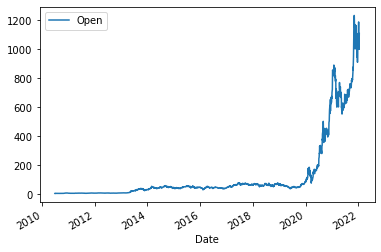

In [120]:
tesla_data.reset_index(inplace=True)
tesla_data.plot(x="Date", y="Open")

###  Using a Web Scraping


Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue](https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). Save the text of the response as a variable named `html_data`.


In [100]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [101]:
soup = BeautifulSoup(data,"html5lib")

Using beautiful soup extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column. 


In [102]:
tables_bs = BeautifulSoup(data,"html.parser")
#tables_bs.find("table",class_='historical_data_table table')
tables_bs_q = tables_bs.findAll('table')[1]
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])
for row in tables_bs_q.find("tbody").find_all("tr"):
    cols = row.find_all('td')
    Date = cols[0].text
    Revenue = cols[1].text.replace("$","").replace(",","")
    tesla_revenue = tesla_revenue.append({"Date":Date,"Revenue":Revenue},ignore_index=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue']!=""]


Remove the rows in the dataframe that are empty strings or are NaN in the Revenue column. Print the entire `tesla_revenue` DataFrame to see if you have any.


In [103]:
tesla_revenue.head()

,Date,Revenue
0,2021-09-30,13757
1,2021-06-30,11958
2,2021-03-31,10389
3,2020-12-31,10744
4,2020-09-30,8771
